### auto correlation function(자기 상관 그래프)

$$ 
\begin{align}
autocovariance function:  C_{h} = \dfrac{1}{N}\sum_{t=1}^{N-h} (Y_{t} - \bar{Y} )(Y_{t+h} - \bar{Y} ) 
\tag{1}
\end{align}
$$

$$ 
\begin{align}
variance function:  C_{0} = \dfrac{1}{N}\sum_{t=1}^{N} (Y_{t} - \bar{Y} )^2 
\tag{2}
\end{align}
$$

$$ 
\begin{align}
autocorrelation coefficient:  R_{h} = \dfrac{Autocovariance}{Variance} = \dfrac{ C_{h} }{C_{0} }
\tag{3}
\end{align}
$$

AR,MA를 지정한뒤 ACF와 PACF의 그래프를 그려보면 ARMA모형의 적합성을 판단할 수 있다. <br>
모델 적합성의 가장 큰 증거는 ACF가 점차 감소하는 모습을 띄는 것이다.

In [32]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
birthDF = pd.read_csv('data/daily-total-female-births.txt', index_col = 'Date',
                     parse_dates=['Date'])
birthDF

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [5]:
airDF = pd.read_csv('data/international-airline-passengers.txt', index_col = 'time',
                     parse_dates=['time'])
airDF

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
tempDF = pd.read_csv('data/daily-min-temperatures.csv', index_col = 'date',
                     parse_dates=['date'])
tempDF

,Temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [10]:
n = len(birthDF)//2
n

182

#### birthDF : stationary

In [14]:
n = len(birthDF)//2
#데이터 절반까지의 평균
print( birthDF.iloc[:n].mean() )
print( birthDF.iloc[:n].var() )
print('====================================')
#절반 이후의 평균
print( birthDF.iloc[n:].mean() )
print( birthDF.iloc[n:].var() )

Births    39.763736
dtype: float64
Births    49.485308
dtype: float64
Births    44.185792
dtype: float64
Births    48.976281
dtype: float64


#### airDF : non-stationary

In [15]:
n = len(airDF)//2
#데이터 절반까지의 평균
print( airDF.iloc[:n].mean() )
print( airDF.iloc[:n].var() )
print('====================================')
#절반 이후의 평균
print( airDF.iloc[n:].mean() )
print( airDF.iloc[n:].var() )

passengers    182.902778
dtype: float64
passengers    2275.69464
dtype: float64
passengers    377.694444
dtype: float64
passengers    7471.736307
dtype: float64


#### tempDF : stationary

In [16]:
n = len(tempDF)//2
#데이터 절반까지의 평균
print( tempDF.iloc[:n].mean() )
print( tempDF.iloc[:n].var() )
print('====================================')
#절반 이후의 평균
print( tempDF.iloc[n:].mean() )
print( tempDF.iloc[n:].var() )

Temp    11.043507
dtype: float64
Temp    18.170782
dtype: float64
Temp    11.312
dtype: float64
Temp    14.961956
dtype: float64


기준점을 어디 두느냐에 따라 stationary/non-stationary 판별이 달라질수도

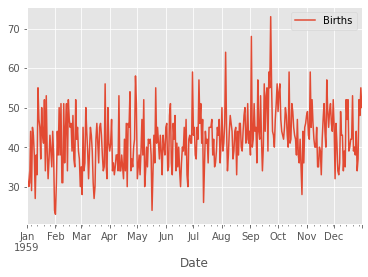

In [17]:
birthDF.plot()
plt.show()

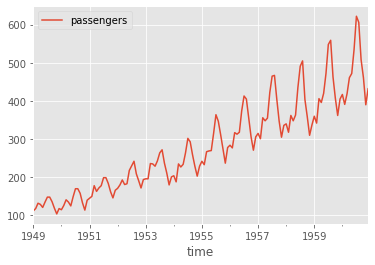

In [18]:
airDF.plot()
plt.show()

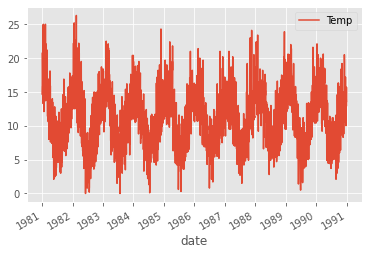

In [19]:
tempDF.plot()
plt.show()

In [20]:
tempDF['days'] = range(0, len(tempDF))
tempDF

,Temp,days
date,,
1981-01-01,20.7,0
1981-01-02,17.9,1
1981-01-03,18.8,2
1981-01-04,14.6,3
1981-01-05,15.8,4
...,...,...
1990-12-27,14.0,3645
1990-12-28,13.6,3646
1990-12-29,13.5,3647


In [21]:
temps = tempDF['Temp'].values
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [22]:
temps[1:]

array([17.9, 18.8, 14.6, ..., 13.5, 15.7, 13. ])

In [23]:
temps[:-1]

array([20.7, 17.9, 18.8, ..., 13.6, 13.5, 15.7])

In [25]:
#auto correlation
np.corrcoef(temps[1:], temps[:-1])[0, 1] # lag 1

0.7748702165384455

In [26]:
np.corrcoef(temps[2:], temps[:-2])[0, 1] # lag 2

0.6311194620684837

In [27]:
np.corrcoef(temps[3:], temps[:-3])[0, 1] # lag 3

0.5863748620126276

In [28]:
autocorrelation = []
for shift in range(1, 10):
    c = np.corrcoef(temps[:-shift], temps[shift:])[0, 1]
    autocorrelation.append(c)
autocorrelation

[0.7748702165384455,
 0.6311194620684837,
 0.5863748620126277,
 0.5788976133377622,
 0.5785715744112058,
 0.5765484145122558,
 0.5759289535831575,
 0.5695569780397493,
 0.5634747178408283]

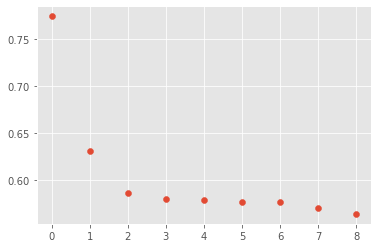

In [31]:
plt.scatter(range(0, len(autocorrelation)), autocorrelation)
plt.show()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, acf

In [34]:
result = acf(tempDF['Temp'])
result

array([1.        , 0.774268  , 0.6302866 , 0.58529312, 0.57774567,
       0.57728013, 0.57510412, 0.57437039, 0.56782622, 0.56120131,
       0.54668689, 0.53793111, 0.54012564, 0.54247126, 0.53688723,
       0.53429917, 0.53043593, 0.52911166, 0.53037444, 0.52280732,
       0.52303677, 0.52224579, 0.51426684, 0.49837745, 0.49302665,
       0.49946731, 0.50428521, 0.50068173, 0.49157081, 0.48146406,
       0.47421245, 0.47568054, 0.46311862, 0.46215585, 0.46630567,
       0.45459092, 0.43378232, 0.4203594 , 0.42707505, 0.42196486,
       0.4079607 ])

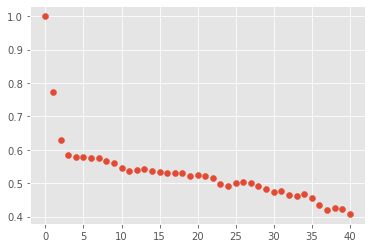

In [35]:
plt.scatter(range(0, len(result)), result)
plt.show()

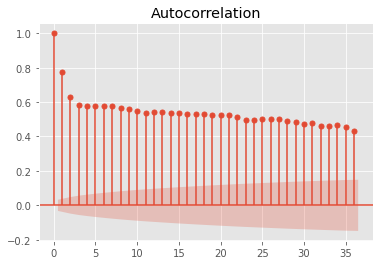

In [37]:
plot_acf(tempDF['Temp'])
plt.show()

자기상관계수가 점점 줄어들수록 non-stationary

#### adfuller 판단지표
    검증 조건 ( p-value : 5% 이내면 귀무가설 기각, 대체가설 선택됨 )
    귀무가설(H0): non-stationary
    대체가설 (H1): stationary

In [38]:
from statsmodels.tsa.stattools import adfuller

In [41]:
result = adfuller(birthDF['Births'])
print(result[0]) #adf (적을수록 귀무가설을 기각시킬 확률이 높음)
print(result[1]) #p-value

-4.808291253559764
5.2434129901498554e-05


In [42]:
result = adfuller(airDF['passengers'])
print(result[0]) #adf (적을수록 귀무가설을 기각시킬 확률이 높음)
print(result[1]) #p-value

0.815368879206063
0.9918802434376413


In [43]:
result = adfuller(tempDF['Temp'])
print(result[0]) #adf (적을수록 귀무가설을 기각시킬 확률이 높음)
print(result[1]) #p-value

-4.444804924611691
0.00024708263003610866


#### ARIMA

In [44]:
order = (2, 1, 2)
model = ARIMA(airDF, order)
rfit = model.fit()
rfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.711
Date:                Tue, 11 Jan 2022   AIC                           1344.043
Time:                        14:42:35   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.passengers    -1.9100      0.065    -29.529      0.000      -2.037      -1.783
ma.L2.D.passengers     0.9999      0.068     14.810      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [47]:
rfit.aic

1344.043386072241

ARIMA(2,1,2)
\begin{equation}
y_t = 1.6477 y'_{t-1} -0.9094 y'_{t-2} + e_t -1.9101e_{t-1} +0.9999e_{t-2}
\end{equation}
</h3>
를 따르는 ARIMA모델임을 확인할 수 있다.

In [45]:
def arima_aic_check(data, order, sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [46]:
arima_aic_check(airDF, [3, 3, 3])

,order,AIC
21,p:2 d:1 q:2,1344.043386
20,p:2 d:1 q:1,1361.695809
13,p:1 d:1 q:2,1371.815374
15,p:1 d:2 q:2,1393.908442
23,p:2 d:2 q:2,1394.656208
7,p:0 d:2 q:2,1396.371696
19,p:2 d:1 q:0,1397.975152
4,p:0 d:1 q:2,1398.385532
3,p:0 d:1 q:1,1398.827110
12,p:1 d:1 q:1,1402.145400


In [49]:
rfit.predict(1, 10, typ='levels')

1949-02-01    114.531095
1949-03-01    121.350895
1949-04-01    137.221342
1949-05-01    129.789527
1949-06-01    119.169414
1949-07-01    136.762407
1949-08-01    149.739078
1949-09-01    147.367310
1949-10-01    134.798629
1949-11-01    121.076958
Freq: MS, dtype: float64

In [50]:
rfit.predict('1950-01-01', '1950-12-01', typ = 'levels')

1950-01-01    131.476250
1950-02-01    132.058359
1950-03-01    143.953622
1950-04-01    156.328661
1950-05-01    147.710842
1950-06-01    136.542423
1950-07-01    155.854096
1950-08-01    168.939889
1950-09-01    162.271156
1950-10-01    147.633290
1950-11-01    126.286612
1950-12-01    115.225257
Freq: MS, dtype: float64

In [52]:
preds = rfit.predict('1960-07-01', '1961-07-01', typ = 'levels')

In [54]:
train = airDF[:'1960-07-01']
test = airDF['1960-07-01':]
test

,passengers
time,
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


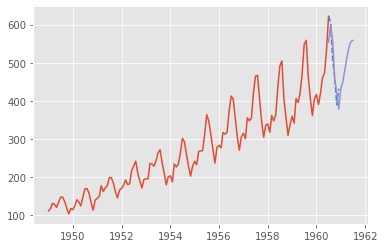

In [56]:
plt.plot(train)
plt.plot(test, '--')
plt.plot(preds)
plt.show()

#### 연습문제
    1. acf
    2. adfuller : stationary/non-stationary?
    3. 최적 p, d, q
    4. arima 모델로 예측 (2001-11-13, 2001-11-20)
        실제값 & 예측값을 그래프로 그리시오

In [57]:
df = pd.DataFrame([
        ['2001-11-01', 0.998543],
        ['2001-11-02', 1.914526],
        ['2001-11-03', 3.057407],
        ['2001-11-04', 4.044301],
        ['2001-11-05', 4.952441],
        ['2001-11-06', 6.002932],
        ['2001-11-07', 6.930134],
        ['2001-11-08', 8.011137],
        ['2001-11-09', 9.040393],
        ['2001-11-10', 10.097007],
        ['2001-11-11', 11.063742],
        ['2001-11-12', 12.051951],
        ['2001-11-13', 13.062637],
        ['2001-11-14', 14.086016],
        ['2001-11-15', 15.096826],
        ['2001-11-16', 15.944886],
        ['2001-11-17', 17.027107],
        ['2001-11-18', 17.930240],
        ['2001-11-19', 18.984202],
        ['2001-11-20', 19.971603]
    ], columns=['date', 'count'])
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')
print(df)

                count
date                 
2001-11-01   0.998543
2001-11-02   1.914526
2001-11-03   3.057407
2001-11-04   4.044301
2001-11-05   4.952441
2001-11-06   6.002932
2001-11-07   6.930134
2001-11-08   8.011137
2001-11-09   9.040393
2001-11-10  10.097007
2001-11-11  11.063742
2001-11-12  12.051951
2001-11-13  13.062637
2001-11-14  14.086016
2001-11-15  15.096826
2001-11-16  15.944886
2001-11-17  17.027107
2001-11-18  17.930240
2001-11-19  18.984202
2001-11-20  19.971603


In [58]:
result = acf(df['count'])
result

array([ 1.        ,  0.85051096,  0.70111766,  0.55770427,  0.41727086,
        0.28272744,  0.15409016,  0.03335875, -0.07545946, -0.17166745,
       -0.25369122, -0.32166247, -0.37250429, -0.40465095, -0.41553391,
       -0.40615602, -0.37568118, -0.32135199, -0.24323865, -0.13518252])

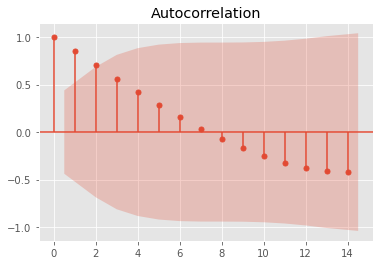

In [59]:
plot_acf(df['countb'])
plt.show()

non-stationary

In [60]:
result = adfuller(df['count'])
print(result[0]) #adf (적을수록 귀무가설을 기각시킬 확률이 높음)
print(result[1]) #p-value

-7.573269903544496
2.804546459120648e-11


In [61]:
arima_aic_check(df, [3, 3, 3])

,order,AIC
4,p:0 d:1 q:1,-46.510330
10,p:1 d:1 q:0,-46.352253
11,p:1 d:1 q:1,-44.691545
5,p:0 d:1 q:2,-44.595638
17,p:2 d:1 q:0,-44.545073
18,p:2 d:1 q:1,-44.052351
12,p:1 d:1 q:2,-42.796456
3,p:0 d:1 q:0,-41.995440
19,p:2 d:1 q:2,-38.789645
8,p:0 d:2 q:2,-38.039368


최적 p, d, q = [0, 1, 1]

In [62]:
order = (0, 1, 1)
model = ARIMA(df, order)
rfit = model.fit()
rfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                   19
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  26.255
Method:                       css-mle   S.D. of innovations              0.060
Date:                Tue, 11 Jan 2022   AIC                            -46.510
Time:                        15:33:12   BIC                            -43.677
Sample:                    11-02-2001   HQIC                           -46.031
                         - 11-20-2001                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9995      0.006    167.035      0.000       0.988       1.011
ma.L1.D.count    -0.6026      0.213     -2.830      0.005      -1.020      -0.185
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.6596           +0.0000j            1.6596            0.0000
-----------------------------------------------------------------------------
"""

In [63]:
preds = rfit.predict('2001-11-13', '2001-11-20', typ = 'levels')

In [65]:
train = df[:'2001-11-13']
test = df['2001-11-13':]

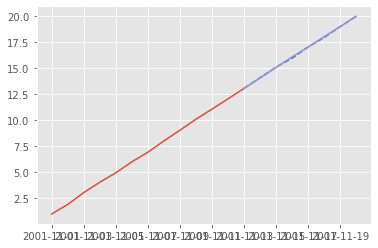

In [66]:
plt.plot(train)
plt.plot(test, '--')
plt.plot(preds)
plt.show()